In [1]:
import pandas as pd
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

import keras

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

import os # used for navigating to image path
import imageio # used for writing images

import datetime


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


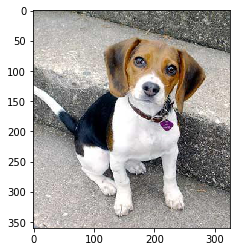

In [2]:
## Load the image
data = plt.imread('/Users/ilya/Desktop/U-Capstone/Images/n02088364-beagle/n02088364_2019.jpg')

# Display the image
plt.imshow(data)
plt.show()

In [7]:
## function that turns an image into an array

def img_to_np_array(path):
    image = load_img(path, target_size=(224, 224))
    np_array = img_to_array(image)
    return np_array

In [16]:
### we are creating a dataframe that would store all metadata about the 
#pictures including the path and breed labels

file_paths = []
image_ids = []
breed_labels = []

for directory in os.listdir('/Users/ilya/Desktop/U-Capstone/Images/'):
    if directory != '.DS_Store':
        for file in os.listdir('/Users/ilya/Desktop/U-Capstone/Images/'+str(directory)):
            file_paths.append('/Users/ilya/Desktop/U-Capstone/Images/'
                              +str(directory)+'/'+str(file))
            breed_labels.append(str(directory).split('-')[1])
            image_ids.append(file)
            
df = pd.DataFrame()

df['file_path'] = file_paths
df['image_id'] = image_ids
df['breed_labels'] = breed_labels

trial_df = df.iloc[0:4000]
trial_df

,file_path,image_id,breed_labels
0,/Users/ilya/Desktop/U-Capstone/Images/n0209765...,n02097658_26.jpg,silky_terrier
1,/Users/ilya/Desktop/U-Capstone/Images/n0209765...,n02097658_4869.jpg,silky_terrier
2,/Users/ilya/Desktop/U-Capstone/Images/n0209765...,n02097658_595.jpg,silky_terrier
3,/Users/ilya/Desktop/U-Capstone/Images/n0209765...,n02097658_9222.jpg,silky_terrier
4,/Users/ilya/Desktop/U-Capstone/Images/n0209765...,n02097658_422.jpg,silky_terrier
...,...,...,...
3995,/Users/ilya/Desktop/U-Capstone/Images/n0211397...,n02113978_177.jpg,Mexican_hairless
3996,/Users/ilya/Desktop/U-Capstone/Images/n0211397...,n02113978_759.jpg,Mexican_hairless
3997,/Users/ilya/Desktop/U-Capstone/Images/n0211397...,n02113978_573.jpg,Mexican_hairless
3998,/Users/ilya/Desktop/U-Capstone/Images/n0211397...,n02113978_2966.jpg,Mexican_hairless


In [17]:
## we are creating a multi-dimensional numpy array that stores image information and labels

time1 = datetime.datetime.now()

train_data = []

for file_path, breed_label in zip(trial_df['file_path'], trial_df['breed_labels']):
    img_np_array = img_to_np_array(file_path)
    train_data.append([img_np_array, breed_label])

np.random.shuffle(train_data)    
    
time2 = datetime.datetime.now()
elapsedTime = time2 - time1
run_time = elapsedTime.total_seconds()

print('Run time: {} seconds'.format(run_time))

Run time: 22.543127 seconds


In [18]:
#we are seperating train_data into image array and train labels

time1 = datetime.datetime.now()

train_images = np.array([i[0] for i in train_data])
train_labels = np.array([i[1] for i in train_data])

time2 = datetime.datetime.now()
elapsedTime = time2 - time1
run_time = elapsedTime.total_seconds()

print('Run time: {} seconds'.format(run_time))

Run time: 11.764529 seconds


In [19]:
train_images.shape

(4000, 224, 224, 3)

In [20]:
#this is funky and I guess could be improved – we are hot encoding train labels
#and turning them into numpy array

train_labels_np = pd.get_dummies(train_labels).to_numpy()
train_labels_np.shape

(4000, 24)

In [22]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(224, 224, 3)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(24, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Fit the model
model.fit(train_images, train_labels_np, validation_split=0.2, epochs=3, shuffle = True)

Epoch 1/3
100/100 [==============================] - 38s 374ms/step - loss: 11252.1157 - accuracy: 0.0424 - val_loss: 215.4446 - val_accuracy: 0.0613
Epoch 2/3
100/100 [==============================] - 33s 330ms/step - loss: 73.2902 - accuracy: 0.4956 - val_loss: 138.6062 - val_accuracy: 0.0688
Epoch 3/3
100/100 [==============================] - 38s 368ms/step - loss: 16.7993 - accuracy: 0.8803 - val_loss: 121.0830 - val_accuracy: 0.0812
